In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [2]:
data = pd.read_excel(r'C:\Users\nijat\Desktop\PYTHON - KURS\Ders 17\Titanic.xlsx')

data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,1


In [3]:
# descriptive stats

In [4]:
data.describe(include = 'all')

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,418.000000,418.000000,418,332.000000,418.000000,418.000000,418,417.000000,91,418,418.000000
unique,NaN,NaN,418,NaN,NaN,NaN,363,NaN,76,3,NaN
top,NaN,NaN,"Kelly, Mr. James",NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,5,NaN,3,270,NaN
mean,1100.500000,2.265550,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,0.363636
std,120.810458,0.841838,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,0.481622
min,892.000000,1.000000,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,1.000000


In [5]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [6]:
data['Age'].fillna(int(data['Age'].mean()), inplace=True)
data['Fare'].fillna(int(data['Fare'].mean()), inplace=True)
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [7]:
data

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",30.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",30.0,0,0,359309,8.0500,NaN,S,0


In [8]:
# variable of interest

In [9]:
data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.026751,-0.030935,0.003818,0.043080,0.008222,-0.023245
Pclass,-0.026751,1.000000,-0.443234,0.001087,0.018721,-0.576642,-0.108615
Age,-0.030935,-0.443234,1.000000,-0.078870,-0.044980,0.328365,0.000662
SibSp,0.003818,0.001087,-0.078870,1.000000,0.306895,0.171501,0.099943
Parch,0.043080,0.018721,-0.044980,0.306895,1.000000,0.230012,0.159120
Fare,0.008222,-0.576642,0.328365,0.171501,0.230012,1.000000,0.191403
Survived,-0.023245,-0.108615,0.000662,0.099943,0.159120,0.191403,1.000000


In [10]:
data = data[['Age', 'Parch', 'Fare', 'Embarked', 'Survived']]
data

,Age,Parch,Fare,Embarked,Survived
0,34.5,0,7.8292,Q,0
1,47.0,0,7.0000,S,1
2,62.0,0,9.6875,Q,0
3,27.0,0,8.6625,S,0
4,22.0,1,12.2875,S,1
...,...,...,...,...,...
413,30.0,0,8.0500,S,0
414,39.0,0,108.9000,C,1
415,38.5,0,7.2500,S,0
416,30.0,0,8.0500,S,0


In [11]:
# missing value treatment

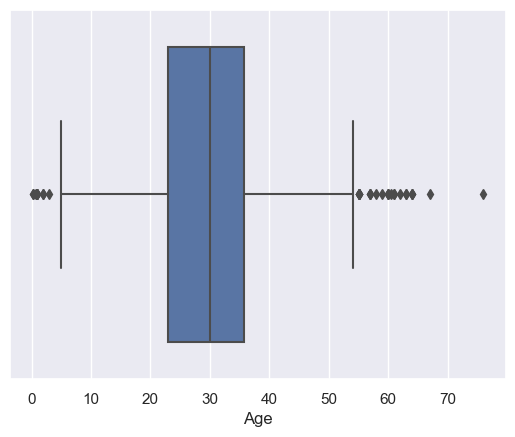

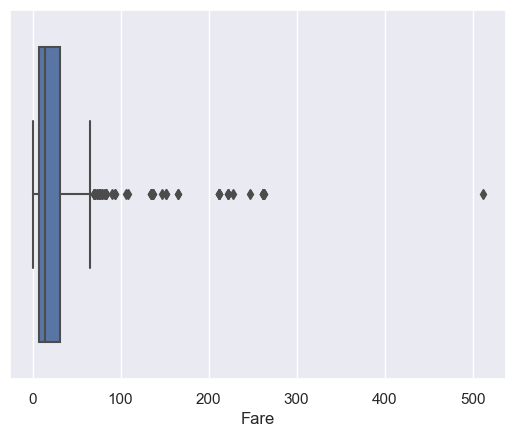

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

for i in data[['Age', 'Fare']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [13]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1

Lower = q1 - 1.5*IQR
Upper = q3 + 1.5*IQR

In [14]:
Upper

Age         54.8750
Parch        0.0000
Fare        66.9063
Survived     2.5000
dtype: float64

In [15]:
Lower

Age          3.8750
Parch        0.0000
Fare       -27.5105
Survived    -1.5000
dtype: float64

In [16]:
for i in data[['Age', 'Fare']]:
    data[i] = np.where(data[i] < Lower[i], Lower[i], data[i])
    data[i] = np.where(data[i] > Upper[i], Upper[i], data[i])

C:\Users\nijat\AppData\Local\Temp\ipykernel_12528\952086506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i], Lower[i], data[i])
C:\Users\nijat\AppData\Local\Temp\ipykernel_12528\952086506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i], Upper[i], data[i])


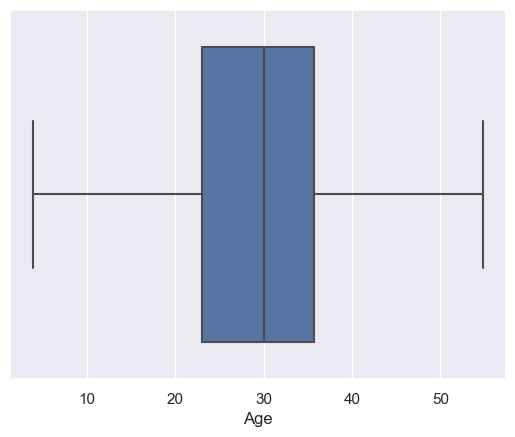

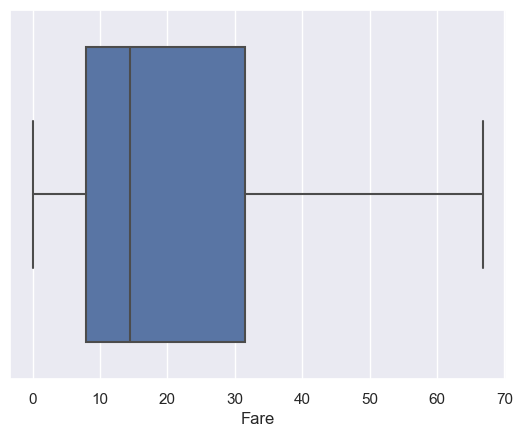

In [17]:
for i in data[['Age', 'Fare']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [18]:
# correlation

In [19]:
data.corr()

,Age,Parch,Fare,Survived
Age,1.000000,-0.046227,0.332897,-0.005824
Parch,-0.046227,1.000000,0.314525,0.159120
Fare,0.332897,0.314525,1.000000,0.202758
Survived,-0.005824,0.159120,0.202758,1.000000


In [20]:
# vif 

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Age', 'Parch', 'Fare']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns
vif

,VIF,Features
0,2.630083,Age
1,1.294038,Parch
2,3.014756,Fare


In [21]:
# outlier

#done

In [22]:
# conversions

# change embark 

In [23]:
# transform values of fare and age into WOE

# labels of fare will be 'low', 'medium-lo', 'medium', 'high' (with quantiles)
# labels of age will be 'Infant', 'Kid', 'Young', 'Adult', 'Old' (choose your own range)

In [24]:
ranges = [0, 5, 15, 29, 45, 90] 
labels_added = ['Infant', 'Kid', 'Young', 'Adult', 'Old']


data['age_labels'] = pd.cut(data['Age'], 
                                  bins=ranges, 
                                  labels=labels_added)
data.head(5)

C:\Users\nijat\AppData\Local\Temp\ipykernel_12528\3683609294.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_labels'] = pd.cut(data['Age'],


,Age,Parch,Fare,Embarked,Survived,age_labels
0,34.500,0,7.8292,Q,0,Adult
1,47.000,0,7.0000,S,1,Old
2,54.875,0,9.6875,Q,0,Old
3,27.000,0,8.6625,S,0,Young
4,22.000,1,12.2875,S,1,Young


In [25]:
data.describe()

,Age,Parch,Fare,Survived
count,418.000000,418.000000,418.000000,418.000000
mean,29.972488,0.392344,24.702404,0.363636
std,11.707465,0.981429,21.211515,0.481622
min,3.875000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,7.895800,0.000000
50%,30.000000,0.000000,14.454200,0.000000
75%,35.750000,0.000000,31.500000,1.000000
max,54.875000,9.000000,66.906300,1.000000


In [26]:
ranges = [-1, data['Fare'].quantile(0.25), data['Fare'].quantile(0.5), data['Fare'].quantile(0.75), np.inf]  # np.inf for infinity
labels_added = ['low', 'medium-lo', 'medium', 'high']
data['Fare_labels'] = pd.cut(data['Fare'], 
                                  bins=ranges, 
                                  labels=labels_added)
data.head(5)

C:\Users\nijat\AppData\Local\Temp\ipykernel_12528\1112838823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare_labels'] = pd.cut(data['Fare'],


,Age,Parch,Fare,Embarked,Survived,age_labels,Fare_labels
0,34.500,0,7.8292,Q,0,Adult,low
1,47.000,0,7.0000,S,1,Old,low
2,54.875,0,9.6875,Q,0,Old,medium-lo
3,27.000,0,8.6625,S,0,Young,medium-lo
4,22.000,1,12.2875,S,1,Young,medium-lo


In [27]:
woe_df = data.groupby('age_labels').agg({'Survived':np.mean})

In [28]:
woe_df = pd.DataFrame(woe_df)
woe_df

,Survived
age_labels,
Infant,0.583333
Kid,0.300000
Young,0.379085
Adult,0.325967
Old,0.423077


In [29]:
woe_df['good'] = woe_df['Survived']
woe_df['bad'] = 1 - woe_df['good']
woe_df

,Survived,good,bad
age_labels,,,
Infant,0.583333,0.583333,0.416667
Kid,0.300000,0.300000,0.700000
Young,0.379085,0.379085,0.620915
Adult,0.325967,0.325967,0.674033
Old,0.423077,0.423077,0.576923


In [30]:
woe_df['bad'] = np.where(woe_df['bad']==0,0.00001,woe_df['bad'])
woe_df['WOE'] = np.log(woe_df['good']/woe_df['bad'])

woe_df

,Survived,good,bad,WOE
age_labels,,,,
Infant,0.583333,0.583333,0.416667,0.336472
Kid,0.300000,0.300000,0.700000,-0.847298
Young,0.379085,0.379085,0.620915,-0.493434
Adult,0.325967,0.325967,0.674033,-0.726484
Old,0.423077,0.423077,0.576923,-0.310155


In [31]:
data.loc[:,'age_woe'] = data['age_labels'].map(woe_df['WOE'])
data.head()

C:\Users\nijat\AppData\Local\Temp\ipykernel_12528\3020052672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'age_woe'] = data['age_labels'].map(woe_df['WOE'])


,Age,Parch,Fare,Embarked,Survived,age_labels,Fare_labels,age_woe
0,34.500,0,7.8292,Q,0,Adult,low,-0.726484
1,47.000,0,7.0000,S,1,Old,low,-0.310155
2,54.875,0,9.6875,Q,0,Old,medium-lo,-0.310155
3,27.000,0,8.6625,S,0,Young,medium-lo,-0.493434
4,22.000,1,12.2875,S,1,Young,medium-lo,-0.493434


In [32]:
woe_df = data.groupby('Fare_labels').agg({'Survived':np.mean})

In [33]:
woe_df = pd.DataFrame(woe_df)
woe_df

,Survived
Fare_labels,
low,0.263158
medium-lo,0.270833
medium,0.390476
high,0.533981


In [34]:
woe_df['good'] = woe_df['Survived']
woe_df['bad'] = 1 - woe_df['good']
woe_df

,Survived,good,bad
Fare_labels,,,
low,0.263158,0.263158,0.736842
medium-lo,0.270833,0.270833,0.729167
medium,0.390476,0.390476,0.609524
high,0.533981,0.533981,0.466019


In [35]:
woe_df['bad'] = np.where(woe_df['bad']==0,0.00001,woe_df['bad'])
woe_df['WOE'] = np.log(woe_df['good']/woe_df['bad'])

woe_df

,Survived,good,bad,WOE
Fare_labels,,,,
low,0.263158,0.263158,0.736842,-1.029619
medium-lo,0.270833,0.270833,0.729167,-0.990399
medium,0.390476,0.390476,0.609524,-0.445311
high,0.533981,0.533981,0.466019,0.136132


In [36]:
data.loc[:,'fare_woe'] = data['Fare_labels'].map(woe_df['WOE'])
data.head()

C:\Users\nijat\AppData\Local\Temp\ipykernel_12528\551103095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'fare_woe'] = data['Fare_labels'].map(woe_df['WOE'])


,Age,Parch,Fare,Embarked,Survived,age_labels,Fare_labels,age_woe,fare_woe
0,34.500,0,7.8292,Q,0,Adult,low,-0.726484,-1.029619
1,47.000,0,7.0000,S,1,Old,low,-0.310155,-1.029619
2,54.875,0,9.6875,Q,0,Old,medium-lo,-0.310155,-0.990399
3,27.000,0,8.6625,S,0,Young,medium-lo,-0.493434,-0.990399
4,22.000,1,12.2875,S,1,Young,medium-lo,-0.493434,-0.990399


In [37]:
woe_df = data.groupby('Embarked').agg({'Survived':np.mean})

In [38]:
woe_df = pd.DataFrame(woe_df)
woe_df

,Survived
Embarked,
C,0.392157
Q,0.521739
S,0.325926


In [39]:
woe_df['good'] = woe_df['Survived']
woe_df['bad'] = 1 - woe_df['good']
woe_df

,Survived,good,bad
Embarked,,,
C,0.392157,0.392157,0.607843
Q,0.521739,0.521739,0.478261
S,0.325926,0.325926,0.674074


In [40]:
woe_df['bad'] = np.where(woe_df['bad']==0,0.00001,woe_df['bad'])
woe_df['WOE'] = np.log(woe_df['good']/woe_df['bad'])

woe_df

,Survived,good,bad,WOE
Embarked,,,,
C,0.392157,0.392157,0.607843,-0.438255
Q,0.521739,0.521739,0.478261,0.087011
S,0.325926,0.325926,0.674074,-0.726670


In [41]:
data.loc[:,'embarked_woe'] = data['Embarked'].map(woe_df['WOE'])
data.head()

C:\Users\nijat\AppData\Local\Temp\ipykernel_12528\2232740077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'embarked_woe'] = data['Embarked'].map(woe_df['WOE'])


,Age,Parch,Fare,Embarked,Survived,age_labels,Fare_labels,age_woe,fare_woe,embarked_woe
0,34.500,0,7.8292,Q,0,Adult,low,-0.726484,-1.029619,0.087011
1,47.000,0,7.0000,S,1,Old,low,-0.310155,-1.029619,-0.726670
2,54.875,0,9.6875,Q,0,Old,medium-lo,-0.310155,-0.990399,0.087011
3,27.000,0,8.6625,S,0,Young,medium-lo,-0.493434,-0.990399,-0.726670
4,22.000,1,12.2875,S,1,Young,medium-lo,-0.493434,-0.990399,-0.726670


In [42]:
data = data[['Parch', 'age_woe', 'fare_woe', 'embarked_woe', 'Survived']]
data

,Parch,age_woe,fare_woe,embarked_woe,Survived
0,0,-0.726484,-1.029619,0.087011,0
1,0,-0.310155,-1.029619,-0.726670,1
2,0,-0.310155,-0.990399,0.087011,0
3,0,-0.493434,-0.990399,-0.726670,0
4,1,-0.493434,-0.990399,-0.726670,1
...,...,...,...,...,...
413,0,-0.726484,-0.990399,-0.726670,0
414,0,-0.726484,0.136132,-0.438255,1
415,0,-0.726484,-1.029619,-0.726670,0
416,0,-0.726484,-0.990399,-0.726670,0


In [43]:
# choose your final independent and dependent variables (x and y)

In [44]:
x1 = data[['Parch', 'age_woe', 'fare_woe', 'embarked_woe']]
y = data['Survived']

In [45]:
# divide data into train and test
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

In [46]:
data.isnull().sum()

Parch           0
age_woe         0
fare_woe        0
embarked_woe    0
Survived        0
dtype: int64

In [50]:
# apply Logistic Regression
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = reg.predict(X_test)

In [52]:
# show confusion matrix and accuracy score
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[47,  3],
       [28,  6]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.94      0.75        50
           1       0.67      0.18      0.28        34

    accuracy                           0.63        84
   macro avg       0.65      0.56      0.52        84
weighted avg       0.64      0.63      0.56        84



In [49]:
# calculate ROC_AUC_SCORE and GINI

In [54]:
from sklearn.metrics import roc_auc_score


print('AUC Score:', roc_auc_score(y_test, y_pred)*100)

AUC Score: 55.8235294117647


In [55]:
Gini = (roc_auc_score(y_test, y_pred)*2)-1
Gini

0.1164705882352941